# Task A


In [121]:
#numeric
import numpy as np
import pandas as pd
import xlrd
from pandas import DataFrame, read_csv
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

## Credit Card Data

In [122]:
df = pd.read_excel('default_credit_card_clients.xls')
#dar nomes às colunas
df.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
              'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

df = df.drop(['ID'])

df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [124]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    
y=df.as_matrix(columns=[df.columns[23]])

# features

X=df.as_matrix(columns=df.columns[1:])
print(X.shape)

print(X)
print("\n")
print(y)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

(30000, 23)
[[2 2 1 ... 0 0 1]
 [2 2 2 ... 0 2000 1]
 [2 2 2 ... 1000 5000 0]
 ...
 [1 2 2 ... 2000 3100 1]
 [1 3 1 ... 52964 1804 1]
 [1 2 1 ... 1000 1000 1]]


[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print('X_Train:', X_train_std)
print('\nX_Test:', X_train_std)

('X_Train:', array([[ 0.81779323,  0.18719091,  0.85805828, ..., -0.31626876,
        -0.29736488, -0.53668192],
       [-1.22280299,  0.18719091, -1.05969649, ..., -0.22965629,
        -0.18356692, -0.53668192],
       [ 0.81779323,  2.71924188,  0.85805828, ...,  0.25861327,
        -0.09639769, -0.53668192],
       ...,
       [ 0.81779323,  1.4532164 , -1.05969649, ..., -0.31626876,
        -0.01286999, -0.53668192],
       [ 0.81779323,  1.4532164 , -1.05969649, ..., -0.25015237,
        -0.26891539, -0.53668192],
       [ 0.81779323, -1.07883457,  0.85805828, ..., -0.1708127 ,
        -0.18356692, -0.53668192]]))
('\nX_Test:', array([[ 0.81779323,  0.18719091,  0.85805828, ..., -0.31626876,
        -0.29736488, -0.53668192],
       [-1.22280299,  0.18719091, -1.05969649, ..., -0.22965629,
        -0.18356692, -0.53668192],
       [ 0.81779323,  2.71924188,  0.85805828, ...,  0.25861327,
        -0.09639769, -0.53668192],
       ...,
       [ 0.81779323,  1.4532164 , -1.05969649, 

In [77]:
from sklearn.decomposition import PCA 
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.28244891, 0.16777631, 0.07058953, 0.0649071 , 0.04485708,
       0.04136675, 0.04030509, 0.03791644, 0.03726454, 0.03708158,
       0.03222206, 0.03070471, 0.02768002, 0.0244748 , 0.01704142,
       0.01138469, 0.01099061, 0.00823332, 0.00571683, 0.00310724,
       0.00179339, 0.00110693, 0.00103065])

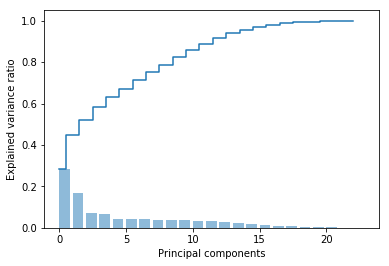

In [78]:
plt.bar(range(23), pca.explained_variance_ratio_, alpha=0.5, align='edge') 
plt.step(range(23), np.cumsum(pca.explained_variance_ratio_), where='mid') 
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show() 

In [79]:
# Only two components for illustration
#pca = PCA(n_components=2)
#X_train_pca = pca.fit_transform(X_train_std)
#X_test_pca = pca.transform(X_test_std)

[[-3.53409676e+00  2.12185538e+00 -5.44146169e-01 ...  2.23887458e-02
   5.86844157e-03  1.05277093e-02]
 [ 4.83273511e-01 -2.06402276e+00 -1.08539197e-01 ... -4.05955848e-04
   1.87055894e-03 -3.06229537e-03]
 [-2.54221547e+00  3.18578613e+00  8.64313905e-01 ...  6.55254581e-02
  -2.11691826e-01  1.04430282e-01]
 ...
 [ 7.84921373e-01 -6.85204716e-01 -7.48302208e-01 ...  3.72511846e-02
   5.52277755e-02 -4.33163755e-02]
 [-4.90437524e-01 -7.73201711e-01 -5.26615572e-01 ...  2.71280134e-01
   1.92537960e-02 -8.61096827e-02]
 [-5.36042593e-01 -6.28157300e-01  6.76261148e-01 ...  2.50916582e-02
  -4.66328711e-03  5.68898677e-03]]


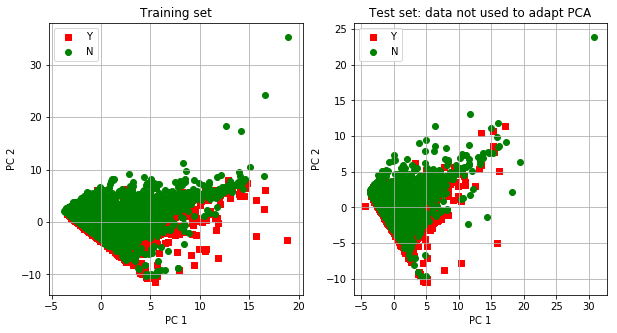

In [80]:
print(X_train_pca)
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()
ax = axes[0]
ax.figure
inx=(y_train==1)
inx=inx.ravel()
ax.scatter(X_train_pca[inx,0],X_train_pca[inx,1],marker='s',color='r',label='Y')

inx=(y_train==0)
inx=inx.ravel() 
ax.scatter(X_train_pca[inx,0],X_train_pca[inx,1],marker='o',color='g',label='N') 
ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()


ax = axes[1]
ax.figure
inx=(y_test==1)
inx=inx.ravel() 
ax.scatter(X_test_pca[inx,0],X_test_pca[inx,1],marker='s',color='r',label='Y') 
inx=(y_test==0)
inx=inx.ravel() 
ax.scatter(X_test_pca[inx,0],X_test_pca[inx,1],marker='o',color='g',label='N')

ax.set_title("Test set: data not used to adapt PCA")

ax.legend()
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## Adult Dataset

In [280]:
#numeric
import numpy as np
import pandas as pd
import xlrd
from pandas import DataFrame, read_csv
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version


### Build table




In [281]:
#df = data
data = pd.read_csv('adult.data.txt', delimiter=", ", header=None, engine='python')
#dar nomes às colunas
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", \
                "marital-status" ,"occupation", "relationship", "race", "sex" ,\
                "capital-gain", "capital-loss", "hours-per-week", "native-country", \
                "probability-label"]

#show all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education-num        32561 non-null int64
marital-status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
race                 32561 non-null object
sex                  32561 non-null object
capital-gain         32561 non-null int64
capital-loss         32561 non-null int64
hours-per-week       32561 non-null int64
native-country       32561 non-null object
probability-label    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Mapping categorical data into numeric data


In [282]:
workclass_map = {'Private': 1,'Self-emp-not-inc': 2,'Self-emp-inc': 3,'Federal-gov': 4,'Local-gov': 5,
                               'State-gov': 6,'Without-pay': 7,'Never-worked': 8}

education_map = {'Bachelors': 1,'Some-college': 2,'11th': 3,'HS-grad': 4,'Prof-school': 5,
                                 'Assoc-acdm': 6,'Assoc-voc': 7,'9th': 8,'7th-8th': 9,'12th': 10,'Masters': 11,
                                 '1st-4th': 12,'10th': 13,'Doctorate': 14,'5th-6th': 15,'Preschool': 16}

marital_map = {'Married-civ-spouse': 1,'Divorced': 2,'Never-married': 3,'Separated': 4,
                                   'Widowed': 5,'Married-spouse-absent': 6,'Married-AF-spouse': 7}

occupation_map = {'Tech-support': 1,'Craft-repair': 2,'Other-service': 3,'Sales': 4,
                                'Exec-managerial': 5,'Prof-specialty': 6,'Handlers-cleaners': 7,
                                'Machine-op-inspct': 8,'Adm-clerical': 9,'Farming-fishing': 10,
                                'Transport-moving': 11,'Priv-house-serv': 12,'Protective-serv': 13,
                                'Armed-Forces': 14}

relationship_map = {'Wife': 1,'Own-child': 2,'Husband': 3,'Not-in-family': 4,
                                      'Other-relative': 5,'Unmarried': 6}

race_map = {'White': 1,'Asian-Pac-Islander': 2,'Amer-Indian-Eskimo': 3,'Other': 4,'Black': 5}

sex_map = {'Female': 1,'Male': 2}

country_map = {'United-States': 1,'Cambodia': 2,'England': 3,'Puerto-Rico': 4,
                                   'Canada': 5,'Germany': 6,'Outlying-US(Guam-USVI-etc)': 7,'India': 8,
                                   'Japan': 9,'Greece': 10,'South': 11,'China': 12,'Cuba': 13,'Iran': 14,
                                   'Honduras': 15,'Philippines': 16,'Italy': 17,'Poland': 18,'Jamaica': 19,
                                   'Vietnam': 20,'Mexico': 21,'Portugal': 22,'Ireland': 23,'France': 24,
                                   'Dominican-Republic': 25,'Laos': 26,'Ecuador': 27,'Taiwan': 28,'Haiti': 29,
                                   'Columbia': 30,'Hungary': 31,'Guatemala': 32,'Nicaragua': 33,'Scotland': 34,
                                   'Thailand': 35,'Yugoslavia': 36,'El-Salvador': 37,'Trinadad&Tobago': 38,
                                   'Peru': 39,'Hong': 40,'Holand-Netherlands': 41}

probability_map = {'<=50K': 1, '>50K' : 2}

data['workclass'] = data['workclass'].map(workclass_map)
data['education'] = data['education'].map(education_map)
data['marital-status'] = data['marital-status'].map(marital_map)
data['occupation'] = data['occupation'].map(occupation_map)
data['relationship'] = data['relationship'].map(relationship_map)
data['race'] = data['race'].map(race_map)
data['sex'] = data['sex'].map(sex_map)
data['native-country'] = data['native-country'].map(country_map)
data['probability-label'] = data['probability-label'].map(probability_map)

In [283]:
#Drop rows with NaN
#data.dropna(thresh=16)

data = data.dropna(how="any")

#data = data[data.age != '?']

### Rank features (Univariate Feature Selection)

In [284]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
import numpy

array = data.values

X2 = array[:,0:15]
Y2 = array[:,14]

#print(X2)
#print("\n")
#print(Y2)
#feature extraction
#k=Number of top features to select
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X2, Y2)

# print summarized scores
numpy.set_printoptions(precision=3)
print("Scores of each feature: ")
print(fit.scores_)

features = fit.transform(X2)

# print the selected features (age,fnlwgt,capital-gain,capital-loss(?))
print("\nSelected features: ")
print(features)
#print(features[0:5,:])


Scores of each feature: 
[7.928e+03 2.723e+02 1.423e+05 7.424e+00 2.178e+03 2.888e+03 9.492e+01
 4.313e+02 2.759e+02 1.852e+02 7.413e+07 1.256e+06 5.569e+03 1.349e+03
 4.515e+03]

Selected features: 
[[3.900e+01 7.752e+04 2.174e+03 0.000e+00]
 [5.000e+01 8.331e+04 0.000e+00 0.000e+00]
 [3.800e+01 2.156e+05 0.000e+00 0.000e+00]
 ...
 [5.800e+01 1.519e+05 0.000e+00 0.000e+00]
 [2.200e+01 2.015e+05 0.000e+00 0.000e+00]
 [5.200e+01 2.879e+05 1.502e+04 0.000e+00]]


### Perform dimension reduction (PCA)

In [ ]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version